In [16]:
import pandas as pd # 导入Pandas
import numpy as np # 导入NumPy
dir = '../input/product-comments/'
dir_train = dir+'Clothing Reviews.csv'
df_train = pd.read_csv(dir_train) # 读入训练集
df_train.head() # 输出部分数据

,id,Review Text,Rating
0,0,Absolutely wonderful - silky and comfortable,4
1,1,Love this dress! it's sooo pretty. i happene...,5
2,2,I had such high hopes for this dress and reall...,3
3,3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,4,This shirt is very flattering to all due to th...,5


In [18]:
from keras.preprocessing.text import Tokenizer # 导入分词工具
X_train_lst = df_train["Review Text"].values # 将评论读入张量(训练集)
y_train = df_train["Rating"].values # 构建标签集
dictionary_size = 20000 # 设定词典的大小
tokenizer = Tokenizer(num_words=dictionary_size) # 初始化词典
tokenizer.fit_on_texts( X_train_lst ) # 使用训练集创建词典索引
# 为所有的单词分配索引值，完成分词工作
X_train_tokenized_lst = tokenizer.texts_to_sequences(X_train_lst)

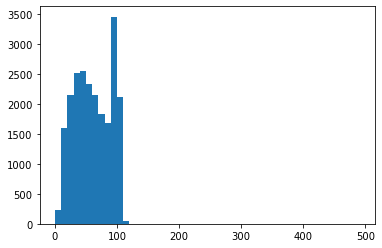

In [20]:
import matplotlib.pyplot as plt # 导入matplotlib
word_per_comment = [len(comment) for comment in X_train_tokenized_lst]
plt.hist(word_per_comment, bins = np.arange(0,500,10)) # 显示评论长度分布
plt.show()

In [22]:
from keras.preprocessing.sequence import pad_sequences 
max_comment_length = 100 # 设定评论输入长度为100，并填充默认值(如字数少于100)
X_train = pad_sequences(X_train_tokenized_lst, maxlen=max_comment_length)

In [24]:
from keras.models import Sequential # 导入贯序模型
from keras.layers.embeddings import Embedding #导入词嵌入层
from keras.layers import Dense #导入全连接层
from keras.layers import SimpleRNN #导入SimpleRNN层
embedding_vecor_length = 60 # 设定词嵌入向量长度为60
rnn = Sequential() # 贯序模型
rnn.add(Embedding(dictionary_size, embedding_vecor_length, 
          input_length=max_comment_length)) # 加入词嵌入层
rnn.add(SimpleRNN(100)) # 加入SimpleRNN层
rnn.add(Dense(10, activation='relu')) # 加入全连接层
rnn.add(Dense(6, activation='softmax')) # 加入分类输出层
rnn.compile(loss='sparse_categorical_crossentropy', #损失函数
            optimizer='adam', # 优化器
            metrics=['acc']) # 评估指标
print(rnn.summary()) #打印网络模型

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 60)           1200000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100)               16100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 66        
Total params: 1,217,176
Trainable params: 1,217,176
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
history = rnn.fit(X_train, y_train, 
                    validation_split = 0.3, 
                    epochs=10, 
                    batch_size=64)

/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15848 samples, validate on 6793 samples
Epoch 1/10
15848/15848 [==============================] - 15s 953us/step - loss: 1.2048 - acc: 0.5578 - val_loss: 1.1041 - val_acc: 0.5616
Epoch 2/10
15848/15848 [==============================] - 15s 974us/step - loss: 1.1425 - acc: 0.5622 - val_loss: 1.0405 - val_acc: 0.5860
Epoch 3/10
15848/15848 [==============================] - 15s 932us/step - loss: 0.9286 - acc: 0.6200 - val_loss: 0.9888 - val_acc: 0.5958
Epoch 4/10
15848/15848 [==============================] - 15s 941us/step - loss: 0.8612 - acc: 0.6392 - val_loss: 1.0176 - val_acc: 0.5718
Epoch 5/10
15848/15848 [==============================] - 15s 930us/step - loss: 0.7848 - acc: 0.6702 - val_loss: 1.0703 - val_acc: 0.6061
Epoch 6/10
15848/15848 [==============================] - 16s 982us/step - loss: 0.7586 - acc: 0.6899 - val_loss: 1.0725 - val_acc: 0.5978
Epoch 7/10
15848/15848 [==============================] - 15s 916us/step - loss: 0.7505 - acc: 0.6956 - val_loss: 1.0

In [28]:
from keras.models import Sequential # 导入贯序模型
from keras.layers.embeddings import Embedding #导入词嵌入层
from keras.layers import Dense #导入全连接层
from keras.layers import LSTM #导入LSTM层
embedding_vecor_length = 60 # 设定词嵌入向量长度为60
lstm = Sequential() # 贯序模型
lstm.add(Embedding(dictionary_size, embedding_vecor_length, 
          input_length=max_comment_length)) # 加入词嵌入层
lstm.add(LSTM(100)) # 加入LSTM层
lstm.add(Dense(10, activation='relu')) # 加入全连接层
lstm.add(Dense(6, activation='softmax')) # 加入分类输出层
lstm.compile(loss='sparse_categorical_crossentropy', #损失函数
             optimizer = 'adam', # 优化器
             metrics = ['acc']) # 评估指标
history = rnn.fit(X_train, y_train, 
                    validation_split = 0.3,
                    epochs=10, 
                    batch_size=64)

Train on 15848 samples, validate on 6793 samples
Epoch 1/10
15848/15848 [==============================] - 15s 926us/step - loss: 0.5846 - acc: 0.7692 - val_loss: 1.2338 - val_acc: 0.5590
Epoch 2/10
15848/15848 [==============================] - 15s 964us/step - loss: 0.6323 - acc: 0.7448 - val_loss: 1.2956 - val_acc: 0.5239
Epoch 3/10
15848/15848 [==============================] - 15s 928us/step - loss: 0.6151 - acc: 0.7559 - val_loss: 1.3152 - val_acc: 0.5145
Epoch 4/10
15848/15848 [==============================] - 16s 995us/step - loss: 0.5681 - acc: 0.7740 - val_loss: 1.2759 - val_acc: 0.5473
Epoch 5/10
15848/15848 [==============================] - 14s 905us/step - loss: 0.5685 - acc: 0.7742 - val_loss: 1.3836 - val_acc: 0.5247
Epoch 6/10
15848/15848 [==============================] - 15s 960us/step - loss: 0.5422 - acc: 0.7868 - val_loss: 1.3773 - val_acc: 0.5360
Epoch 7/10
15848/15848 [==============================] - 15s 915us/step - loss: 0.4545 - acc: 0.8237 - val_loss: 1.4